In [1]:
# Import the packages required
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

In [2]:
# load the data from the datasets available in scikit learn
dataset = datasets.load_iris()
print(type(dataset))

<class 'sklearn.utils.Bunch'>


In [3]:
# print the data structure information
print(dataset.keys())
print(dataset.data.shape)
print(dataset.feature_names)
print(dataset.target_names)
print(dataset.DESCR)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:   

In [4]:
# select the x and y data
x = dataset.data
y = dataset.target
print(x.shape, y.shape)
print(x[0], y[0])

(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0


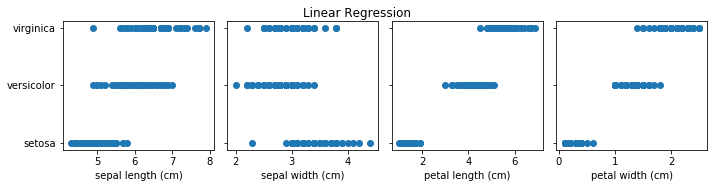

In [11]:
# plot the information
legends = dataset.feature_names
categories = dataset.target_names
num_graphs = len(legends)

figure, plots = plt.subplots(1, num_graphs, figsize=(2.5*num_graphs, 2.5))
figure.suptitle('Linear Regression', y=1.02)

y_cat = [categories[i] for i in y]

for g in range(num_graphs):
    plots[g].scatter(x[:,g], y_cat)
    plots[g].set_xlabel(legends[g])
    if g != 0 : plots[g].set_yticklabels([])

plt.tight_layout(pad=1)
plt.show()

In [6]:
# Split the dataset in training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [7]:
# Define the algorithm to be used, fit the model
alg = linear_model.LinearRegression()
alg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Generate a prediction over the test data using the model
y_pred = alg.predict(x_test)
print(y_pred.shape)
print(y_pred[:10])
print(y_test[:10])

(30,)
[-0.13116899  2.25708011  1.19291506 -0.04246625  2.02284318  1.19268905
  0.86921413  1.93741578  0.17902926 -0.06328929]
[0 2 1 0 2 1 1 2 0 0]


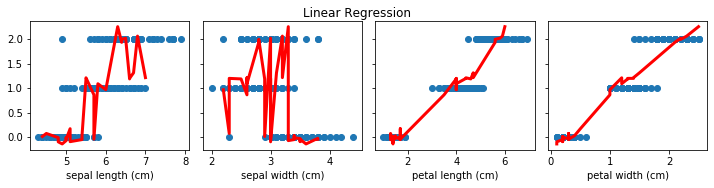

In [13]:
# Graph the test data with the model line
figure, plots = plt.subplots(1, num_graphs, figsize=(2.5*num_graphs, 2.5))
figure.suptitle('Linear Regression', y=1.02)

for g in range(num_graphs):
    data_test = sorted(zip(x_test[:,g], y_pred), key = lambda i : i[0])

    plots[g].scatter(x[:,g], y)
    plots[g].plot([i[0] for i in data_test], [i[1] for i in data_test], color='red', linewidth=3)
    plots[g].set_xlabel(legends[g])
    if g != 0 : plots[g].set_yticklabels([])
    
plt.tight_layout(pad=1)
plt.show()

In [14]:
# Map the predicted linear values to discrete values
y_pred_round = np.round(y_pred).astype(int)
print(y_pred_round[:10])
print(np.unique(y_pred_round))

# Fix the values outside te valid classes
min_y, max_y = np.min(y_train), np.max(y_train)
fixer = lambda i : min_y if i < min_y else max_y if i > max_y else i
y_pred_fix = np.array([i for i in map(fixer, y_pred_round)])
print(y_pred_fix[:10])
print(np.unique(y_pred_fix))

[0 2 1 0 2 1 1 2 0 0]
[0 1 2]
[0 2 1 0 2 1 1 2 0 0]
[0 1 2]


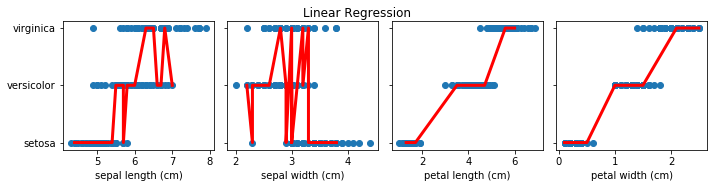

In [15]:
# Graph the test data with the model line
figure, plots = plt.subplots(1, num_graphs, figsize=(2.5*num_graphs, 2.5))
figure.suptitle('Linear Regression', y=1.02)

y_pred_cat = [categories[i] for i in y_pred_fix]

for g in range(num_graphs):
    data_test = sorted(zip(x_test[:,g], y_pred_cat), key = lambda i : i[0])

    plots[g].scatter(x[:,g], y_cat)
    plots[g].plot([i[0] for i in data_test], [i[1] for i in data_test], color='red', linewidth=3)
    plots[g].set_xlabel(legends[g])
    if g != 0 : plots[g].set_yticklabels([])
    
plt.tight_layout(pad=1)
plt.show()

In [ ]:
# Validate, using the confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred_fix)
print(matrix)

In [ ]:
# Verify the model error based on R²
print('certainty:', alg.score(x_train, y_train) * 100, '%')
print('certainty:', alg.score(x_test, y_test) * 100, '%')